### A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pylab as plt
plt.rcParams['figure.figsize'] = [8, 8]
import tqdm as tqdm

knowing that the integral of  exp (-x^2 /2 sigma) is 1 ---> i just need to etraxt form it x_i and then calculate the mean ..
$$\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $$


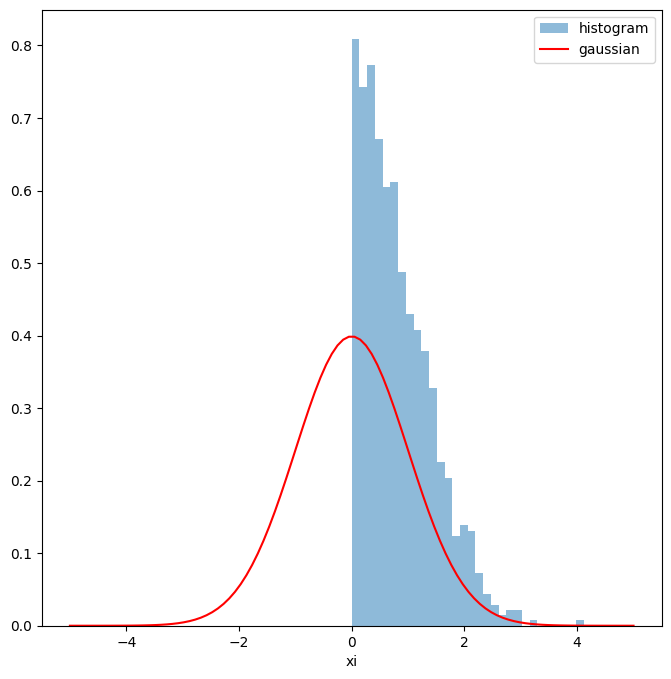

In [3]:
sigma = 1
N = 1000

# I need to sample xi gaussianly distributed....
x = np.random.normal(0, sigma, N)
xi = np.abs(x)
plt.hist(xi, bins=30, density=True, alpha=0.5, label='histogram')
#plt.hist(x, bins=30, density=True, alpha=0.5, label='histogram')

#let's overplot the gaussian
x = np.linspace(-sigma*5, sigma*5, 100)
y = scipy.stats.norm.pdf(x, 0, sigma)

plt.plot(x, y, 'r', label='gaussian')

plt.xlabel('xi')
plt.legend()



In [4]:
f_x = 1/2 *(2 * np.pi * sigma **2)**(0.5)*xi**3
mean_f = np.mean(f_x)
#mean_x = np.mean(xi**3)
MC = 1/N * np.sum(f_x)
analytic = 2 * sigma**4

print("MC integral: ", MC, "Analytic integral: ", analytic, "Mean: ", mean_f)

MC integral:  2.2060209057303064 Analytic integral:  2 Mean:  2.2060209057303064


In [5]:
def MonteCarlo(N, sigma):
    x = np.random.normal(0, sigma, N)
    xi = np.abs(x)
    f_x = 1/2 *(2 * np.pi * sigma **2)**(0.5)*xi**3
    MC = 1/N * np.sum(f_x)
    return MC

### Calculate the integral many times and see how the result is distributed

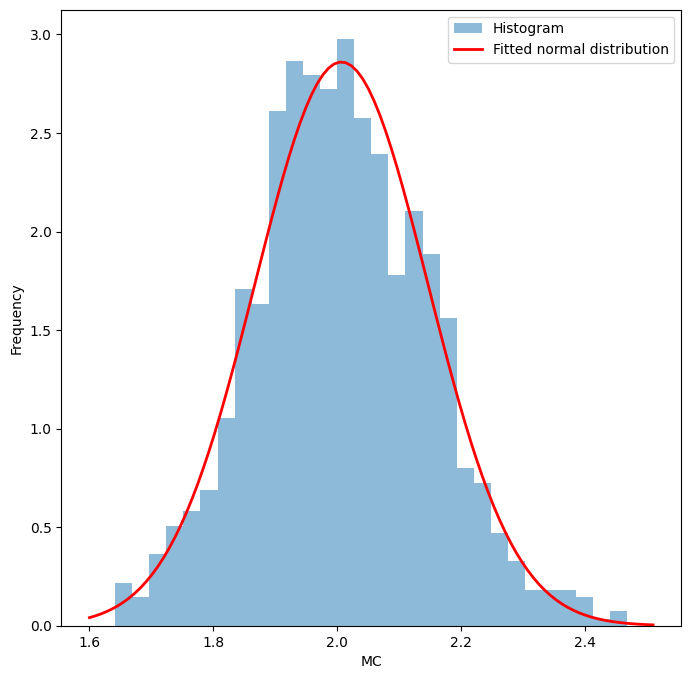

Fitted normal distribution: mu = 2.0067272244184773, std = 0.13946413489958917


In [6]:
N = 1000
num_iterations = 1000

MC_results = []

for _ in range(num_iterations):
    MC = MonteCarlo(N, sigma)
    MC_results.append(MC)



# fit a normal distribution to the results
mu, std = scipy.stats.norm.fit(MC_results)

plt.hist(MC_results, bins=30, density=True, alpha=0.5, label='Histogram')
plt.xlabel('MC')
plt.ylabel('Frequency')
plt.legend()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, color= 'red', linewidth=2, label='Fitted normal distribution')

plt.xlabel('MC')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Fitted normal distribution: mu = {mu}, std = {std}")

### changing the number of samples we extract let's see if the result converges

N = 100, mean = 2.064105339632353, standard deviation = 0.49916701970397476
N = 1000, mean = 2.002011876543509, standard deviation = 0.14631950025004717
N = 10000, mean = 2.000695351006813, standard deviation = 0.04492661125466274
N = 100000, mean = 2.002164103087284, standard deviation = 0.012935274667537865


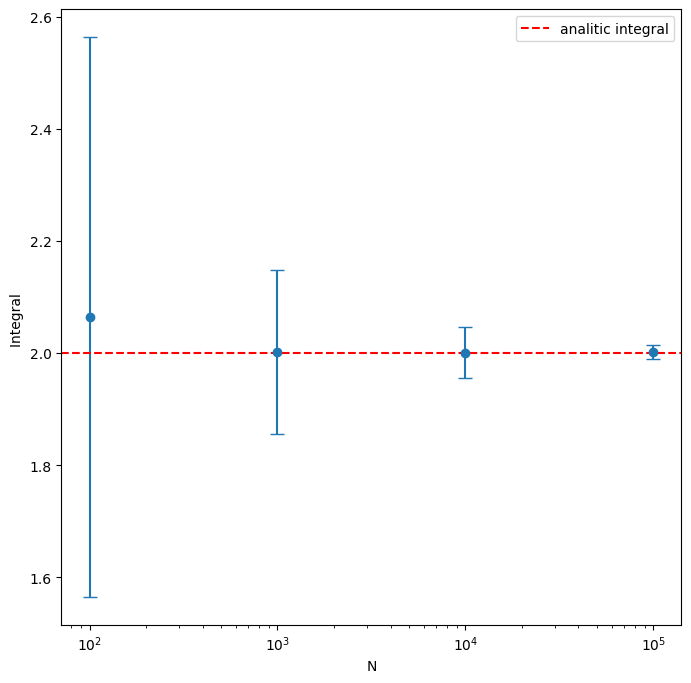

In [8]:
N_values = [100, 1000, 10000, 100000]

results = []
errors = []

for N in N_values:
    MC = [MonteCarlo( N, sigma ) for _ in range(100)]
    mean = np.mean(MC)
    std = np.std(MC)
    results.append(mean)
    errors.append(std)
    print(f"N = {N}, mean = {mean}, standard deviation = {std}")


plt.errorbar(N_values, results, yerr=errors, fmt='o', capsize=5)
plt.axhline(y=analytic, color='r', linestyle='--', label='analitic integral')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Integral ')
plt.legend()
plt.show()